In [32]:
# loading the dataset from tensorflow directly
import tensorflow as tf
tf.random.set_seed(42)

fashion_mnist_dataset = tf.keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist_dataset.load_data()

In [33]:
# class names are not included in the dataset's labels, so we include them here to make plotting in the future easier
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

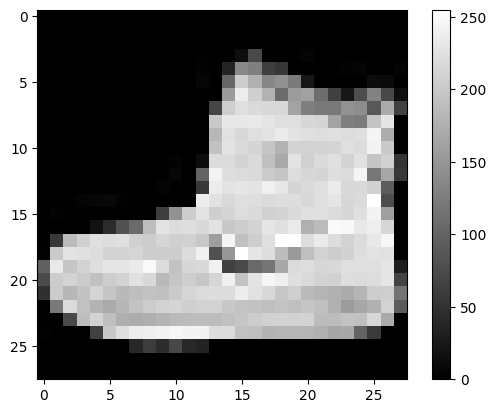

In [34]:
# printing one of the images, to verify that we loaded the dataset correctly
from matplotlib import pyplot as plt 
clothing_item = train_images[0]
plt.figure()
plt.imshow(clothing_item, cmap="gray")
plt.colorbar()
plt.show()

In [35]:
# normalizing pixel data to be in the range from 0-1 in order to improve training later on
train_images = train_images / 255.0
test_images = test_images / 255.0

In [36]:
# reshape images to specify grayscale instead of multiple color channels
train_images= train_images.reshape((train_images.shape[0]), 28, 28, 1)
test_images = test_images.reshape((test_images.shape[0]), 28, 28, 1)

In [37]:
# creating models for classifying the data and compiling it
from tensorflow.keras import models, layers, optimizers
from tensorflow.keras.callbacks import EarlyStopping
import seaborn as sns
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import numpy as np

# Some of this code is generated by chatGPT, in particular the code for generating a confusion matrix

def train_model(layers):
    model = models.Sequential()
    for layer in layers:
        model.add(layer)
    model.add(tf.keras.layers.Dense(10, activation="softmax"))

    model.compile(optimizer=optimizers.Adam(learning_rate=0.001),
                   loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
                   metrics=["accuracy"])

    early_stopping = EarlyStopping(monitor="val_loss", patience=5, restore_best_weights=True)

    model.fit(
        train_images,
        train_labels,
        epochs=30,
        validation_data=(test_images, test_labels),
        callbacks=[early_stopping]
    )
    test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
    print(f"Test accuracy: {test_acc}")

    # CHATGPT GENERATED CODE 

    # Step 1: Make Predictions
    # Predict the classes for the test images
    predictions = model.predict(test_images)  # Assuming test_images is your test data
    predicted_classes = np.argmax(predictions, axis=1)  # Convert probabilities to class labels

    # Step 2: Generate Confusion Matrix
    # `clothing_labels` should be the true labels for your test dataset
    # Generate confusion matrix
    cm = confusion_matrix(test_labels, predicted_classes)

    # Step 3: Visualize the Confusion Matrix
    plt.figure(figsize=(10, 7))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.title('Confusion Matrix')
    plt.show()

Epoch 1/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7704 - loss: 0.6480 - val_accuracy: 0.8495 - val_loss: 0.4111
Epoch 2/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8630 - loss: 0.3791 - val_accuracy: 0.8584 - val_loss: 0.3863
Epoch 3/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8758 - loss: 0.3394 - val_accuracy: 0.8589 - val_loss: 0.3906
Epoch 4/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8827 - loss: 0.3140 - val_accuracy: 0.8686 - val_loss: 0.3606
Epoch 5/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8907 - loss: 0.2937 - val_accuracy: 0.8694 - val_loss: 0.3611
Epoch 6/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8947 - loss: 0.2770 - val_accuracy: 0.8712 - val_loss: 0.3538
Epoch 7/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8986 - loss: 0.2649 - val_accuracy: 0.8736 - val_loss: 0.3598
Epoch 8/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9013 - loss: 0.2563 - 

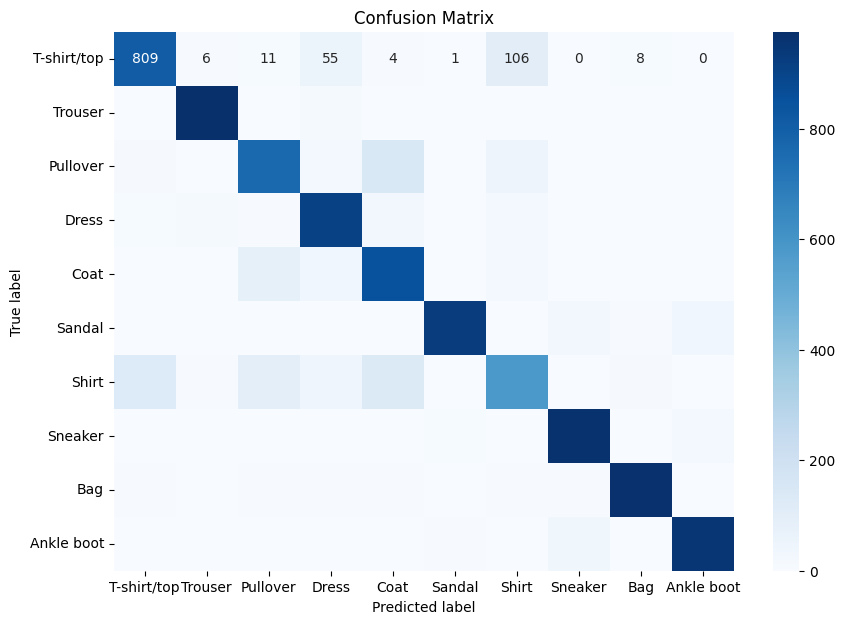

In [38]:
train_model([
	layers.Input(shape=(28,28)),
	layers.Flatten(),
	layers.Dense(64, activation="relu"),
	layers.Dense(256, activation="relu")
])

Epoch 1/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.7621 - loss: 0.6686 - val_accuracy: 0.8503 - val_loss: 0.4149
Epoch 2/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8608 - loss: 0.3825 - val_accuracy: 0.8554 - val_loss: 0.3873
Epoch 3/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8739 - loss: 0.3401 - val_accuracy: 0.8592 - val_loss: 0.3763
Epoch 4/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8816 - loss: 0.3165 - val_accuracy: 0.8623 - val_loss: 0.3698
Epoch 5/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8879 - loss: 0.2994 - val_accuracy: 0.8659 - val_loss: 0.3679
Epoch 6/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8922 - loss: 0.2851 - val_accuracy: 0.8544 - val_loss: 0.3898
Epoch 7/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8962 - loss: 0.2739 - val_accuracy: 0.8596 - val_loss: 0.3810
Epoch 8/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8997 - loss: 0.2638 - 

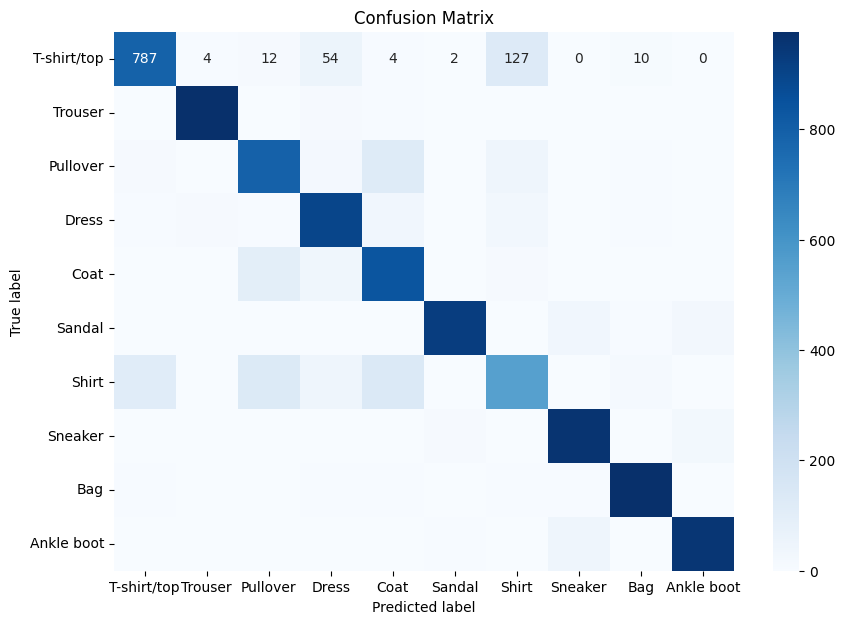

In [39]:
train_model([
	layers.Input(shape=(28,28)),
	layers.Flatten(),
	layers.Dense(64, activation="relu"),
	layers.Dense(64, activation="relu"),
	layers.Dense(256, activation="relu")
])

Epoch 1/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.7725 - loss: 0.6268 - val_accuracy: 0.8411 - val_loss: 0.4263
Epoch 2/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8592 - loss: 0.3797 - val_accuracy: 0.8548 - val_loss: 0.3925
Epoch 3/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8744 - loss: 0.3385 - val_accuracy: 0.8613 - val_loss: 0.3731
Epoch 4/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8819 - loss: 0.3121 - val_accuracy: 0.8610 - val_loss: 0.3753
Epoch 5/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8871 - loss: 0.2957 - val_accuracy: 0.8669 - val_loss: 0.3635
Epoch 6/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8925 - loss: 0.2788 - val_accuracy: 0.8681 - val_loss: 0.3609
Epoch 7/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8991 - loss: 0.2635 - val_accuracy: 0.8728 - val_loss: 0.3598
Epoch 8/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9006 - loss: 0.2547 - 

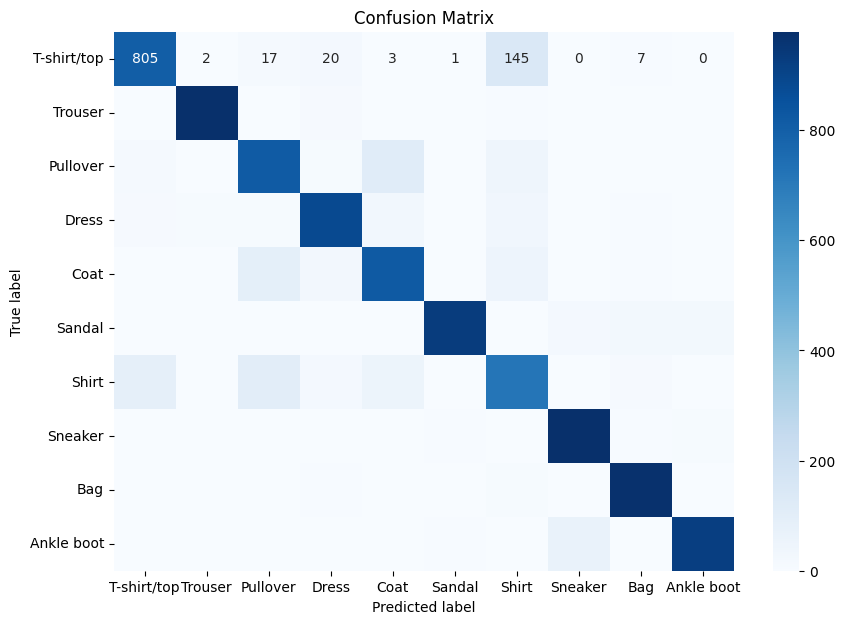

In [40]:
train_model([
	layers.Input(shape=(28,28)),
	layers.Flatten(),
	layers.Dense(256, activation="relu"),
	layers.Dense(64, activation="relu"),
	layers.Dense(512, activation="relu")
])

Epoch 1/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7786 - loss: 0.6243 - val_accuracy: 0.8535 - val_loss: 0.3969
Epoch 2/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.8642 - loss: 0.3708 - val_accuracy: 0.8599 - val_loss: 0.3815
Epoch 3/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8773 - loss: 0.3324 - val_accuracy: 0.8658 - val_loss: 0.3649
Epoch 4/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8852 - loss: 0.3059 - val_accuracy: 0.8720 - val_loss: 0.3511
Epoch 5/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8918 - loss: 0.2841 - val_accuracy: 0.8675 - val_loss: 0.3570
Epoch 6/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8985 - loss: 0.2683 - val_accuracy: 0.8677 - val_loss: 0.3611
Epoch 7/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9031 - loss: 0.2541 - val_accuracy: 0.8713 - val_loss: 0.3613
Epoch 8/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9079 - loss: 0.2398 - 

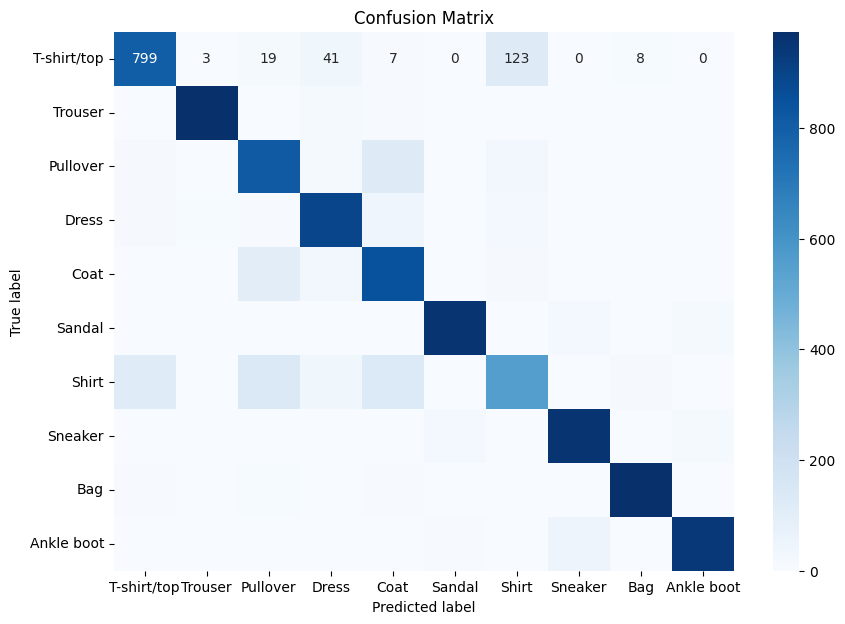

In [41]:
train_model([
	layers.Input(shape=(28,28)),
	layers.Flatten(),
	layers.Dense(128, activation="relu"),
	layers.Dense(256, activation="relu")
])

C:\Users\sigve\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.7700 - loss: 0.6300 - val_accuracy: 0.8764 - val_loss: 0.3420
Epoch 2/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.8900 - loss: 0.3042 - val_accuracy: 0.8919 - val_loss: 0.2993
Epoch 3/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9073 - loss: 0.2517 - val_accuracy: 0.9023 - val_loss: 0.2689
Epoch 4/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9204 - loss: 0.2140 - val_accuracy: 0.9096 - val_loss: 0.2589
Epoch 5/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9315 - loss: 0.1831 - val_accuracy: 0.9067 - val_loss: 0.2698
Epoch 6/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9419 - loss: 0.1575 - val_accuracy: 0.9057 - val_loss: 0.2799
Epoch 7/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9511 - loss: 0.1340 - val_accuracy: 0.9014 - val_loss: 0.3158
Epoch 8/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9584 - loss: 0.

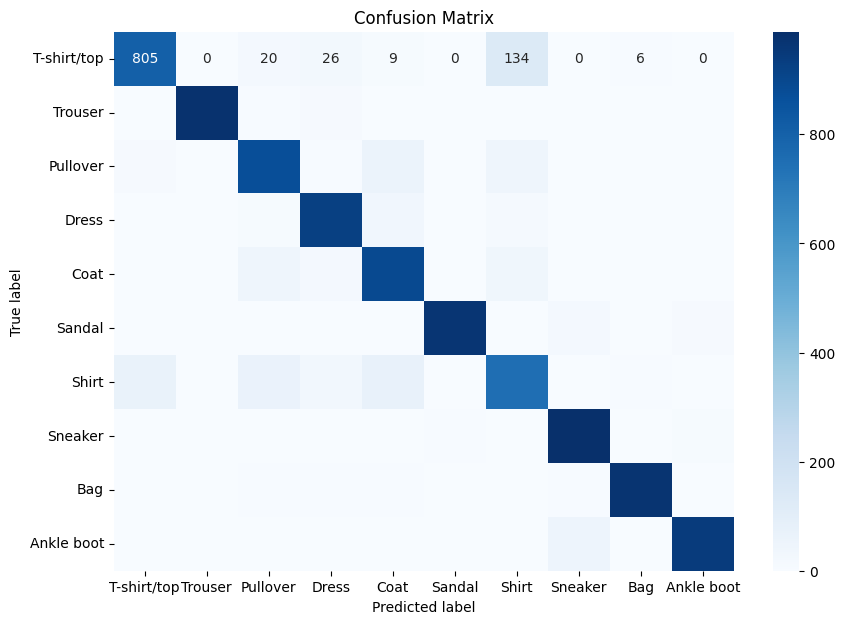

In [42]:
# experimenting with other kinds of models 256, 64, 512

from tensorflow.keras.callbacks import EarlyStopping

new_model = models.Sequential()
new_model.add(layers.Conv2D(32, (3, 3), activation="relu", input_shape=(28, 28, 1)))
#new_model.add(layers.BatchNormalization())
new_model.add(layers.MaxPooling2D((2, 2)))
new_model.add(layers.Conv2D(64, (3, 3), activation="relu"))
#new_model.add(layers.BatchNormalization())
#new_model.add(layers.MaxPooling2D((2, 2)))
#new_model.add(layers.MaxPooling2D((2, 2)))
#new_model.add(layers.Conv2D(32, (3, 3), activation="relu"))

new_model.add(layers.Flatten())
new_model.add(layers.Dense(32, activation="relu"))
#new_model.add(layers.Dropout(0.5))
new_model.add(layers.Dense(64, activation="relu"))
new_model.add(layers.Dense(10, activation="softmax"))

new_model.compile(optimizer=optimizers.Adam(learning_rate=0.001),
                   loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
                   metrics=["accuracy"])

early_stopping = EarlyStopping(monitor="val_loss", patience=5, restore_best_weights=True)

new_model.fit(train_images, train_labels, epochs=30, validation_data=(test_images, test_labels), callbacks=[early_stopping])
test_loss, test_acc = new_model.evaluate(test_images, test_labels, verbose=2)
print(f"Test accuracy: {test_acc}")
print(f"Test loss: {test_loss}")



predictions = new_model.predict(test_images)  # Assuming test_images is your test data
predicted_classes = np.argmax(predictions, axis=1)  # Convert probabilities to class labels

    # Step 2: Generate Confusion Matrix
    # `clothing_labels` should be the true labels for your test dataset
    # Generate confusion matrix
cm = confusion_matrix(test_labels, predicted_classes)

    # Step 3: Visualize the Confusion Matrix
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.title('Confusion Matrix')
plt.show()

C:\Users\sigve\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.7696 - loss: 0.6337 - val_accuracy: 0.8831 - val_loss: 0.3323
Epoch 2/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.8919 - loss: 0.3015 - val_accuracy: 0.8937 - val_loss: 0.3006
Epoch 3/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9087 - loss: 0.2464 - val_accuracy: 0.9029 - val_loss: 0.2711
Epoch 4/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9225 - loss: 0.2089 - val_accuracy: 0.9075 - val_loss: 0.2681
Epoch 5/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9363 - loss: 0.1769 - val_accuracy: 0.8996 - val_loss: 0.3130
Epoch 6/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9441 - loss: 0.1514 - val_accuracy: 0.9044 - val_loss: 0.3053
Epoch 7/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9529 - loss: 0.1301 - val_accuracy: 0.9074 - val_loss: 0.3180
Epoch 8/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9601 - loss: 0

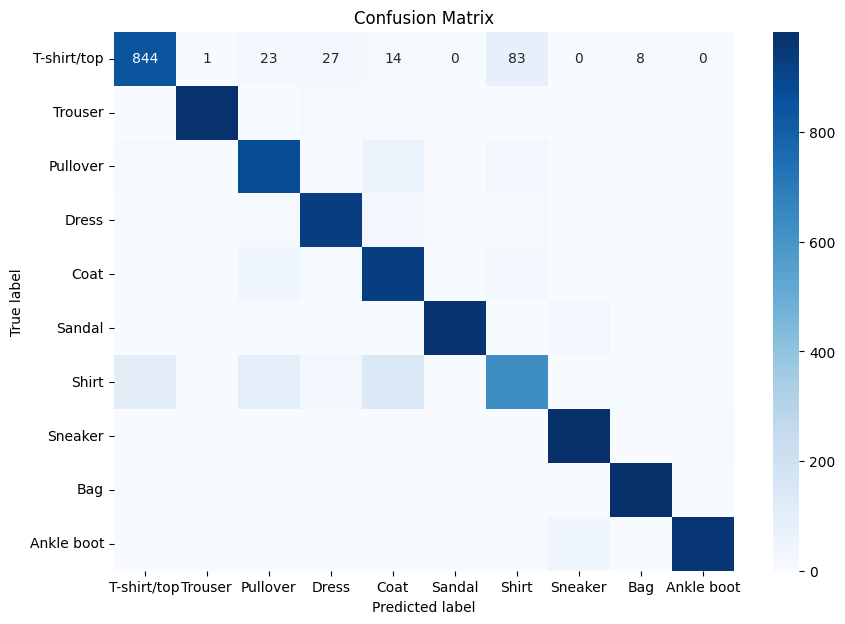

In [43]:
train_model([
	layers.Conv2D(32, (3, 3), activation="relu", input_shape=(28, 28, 1)),
	layers.MaxPooling2D((2, 2)),
	layers.Conv2D(64, (3, 3), activation="relu"),
	layers.Flatten(),
	layers.Dense(32, activation="relu"),
	layers.Dense(64, activation="relu")
])